In [1]:
import PLred.mapmodel as mm
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import minimize
from scipy.ndimage import center_of_mass
import emcee, corner
import PLred.fit as fit


In [2]:
from astropy.modeling.functional_models import Gaussian2D


loading model
Matrix loaded from  /Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind111_ngrid33_t3.fits specind 111
preparing data for specind 111


 41%|████      | 408/1000 [00:35<00:51, 11.49it/s]/Users/yjkim/Documents/PLred/PLred/imgrecon.py:745: RuntimeWarning: invalid value encountered in divide
  _im = _im / np.nansum(_im) # normalize the fluxes
 72%|███████▏  | 724/1000 [01:04<00:23, 11.95it/s]2025-02-26 01:02:12,539 - INFO - out of bounds
2025-02-26 01:02:12,566 - INFO - out of bounds
 73%|███████▎  | 728/1000 [01:04<00:22, 12.20it/s]2025-02-26 01:02:12,816 - INFO - out of bounds
2025-02-26 01:02:12,900 - INFO - out of bounds
 73%|███████▎  | 734/1000 [01:05<00:22, 12.06it/s]2025-02-26 01:02:13,354 - INFO - out of bounds
2025-02-26 01:02:13,433 - INFO - out of bounds
 75%|███████▌  | 750/1000 [01:06<00:20, 12.05it/s]2025-02-26 01:02:14,642 - INFO - out of bounds
2025-02-26 01:02:14,783 - INFO - out of bounds
 76%|███████▌  | 760/1000 [01:07<00:20, 11.81it/s]2025-02-26 01:02:15,511 - INFO - out of bounds
2025-02-26 01:02:15,643 - INFO - out of bounds
 78%|███████▊  | 782/1000 [01:09<00:18, 11.95it/s]2025-02-26 01:02:17,320 

loading model
Matrix loaded from  /Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind112_ngrid33_t3.fits specind 112
preparing data for specind 112


100%|██████████| 1000/1000 [01:32<00:00, 10.82it/s]


loading model
Matrix loaded from  /Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind113_ngrid33_t3.fits specind 113
preparing data for specind 113


100%|██████████| 1000/1000 [01:42<00:00,  9.77it/s]


loading model
Matrix loaded from  /Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind114_ngrid33_t3.fits specind 114
preparing data for specind 114


100%|██████████| 1000/1000 [01:44<00:00,  9.59it/s]


loading model
Matrix loaded from  /Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind115_ngrid33_t3.fits specind 115
preparing data for specind 115


 17%|█▋        | 166/1000 [00:21<01:26,  9.66it/s]2025-02-26 01:08:06,822 - INFO - out of bounds
2025-02-26 01:08:06,874 - INFO - out of bounds
 18%|█▊        | 181/1000 [00:22<01:20, 10.13it/s]2025-02-26 01:08:08,308 - INFO - out of bounds
2025-02-26 01:08:08,351 - INFO - out of bounds
 18%|█▊        | 185/1000 [00:22<01:19, 10.29it/s]2025-02-26 01:08:08,649 - INFO - out of bounds
2025-02-26 01:08:08,782 - INFO - out of bounds
 20%|██        | 203/1000 [00:24<01:28,  8.99it/s]2025-02-26 01:08:10,585 - INFO - out of bounds
2025-02-26 01:08:10,679 - INFO - out of bounds
 21%|██        | 207/1000 [00:25<01:22,  9.66it/s]2025-02-26 01:08:10,978 - INFO - out of bounds
2025-02-26 01:08:11,110 - INFO - out of bounds
 22%|██▏       | 217/1000 [00:26<01:17, 10.15it/s]2025-02-26 01:08:11,961 - INFO - out of bounds
2025-02-26 01:08:12,045 - INFO - out of bounds
 23%|██▎       | 233/1000 [00:27<01:23,  9.17it/s]2025-02-26 01:08:13,633 - INFO - out of bounds
2025-02-26 01:08:13,768 - INFO - out of

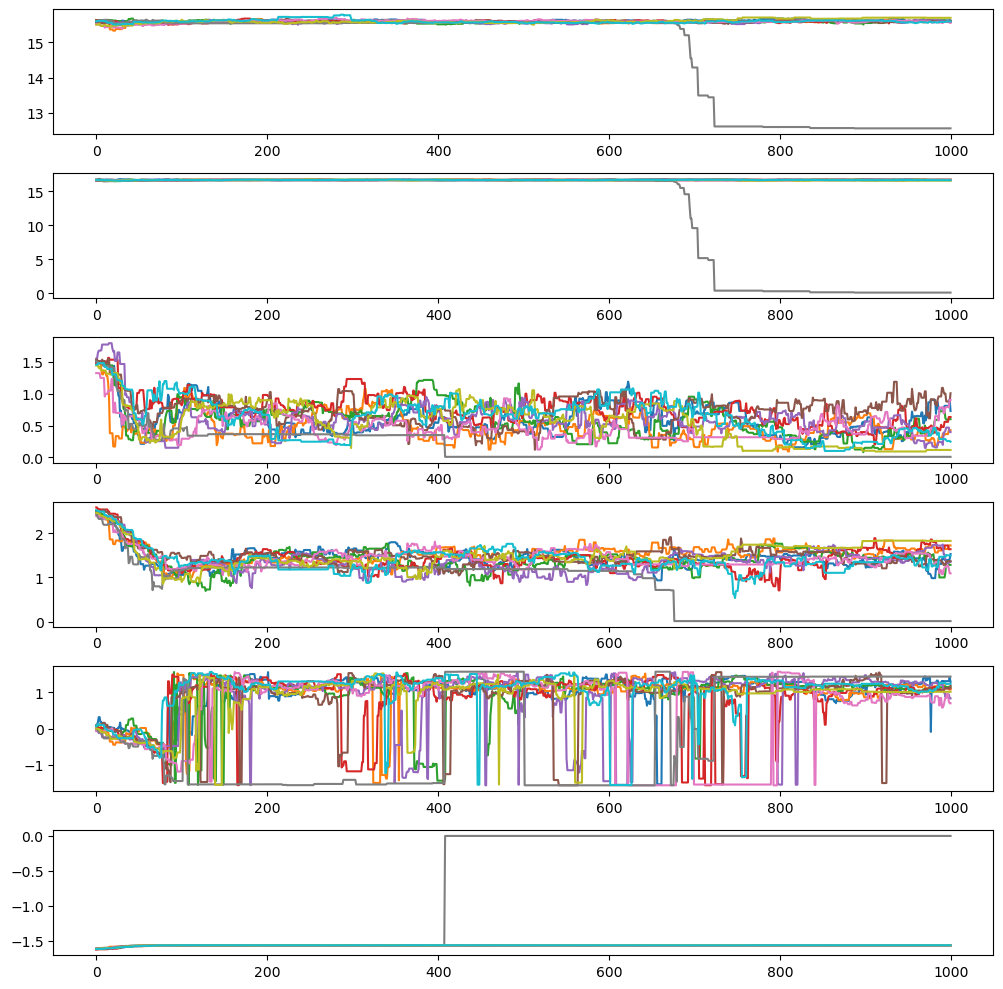

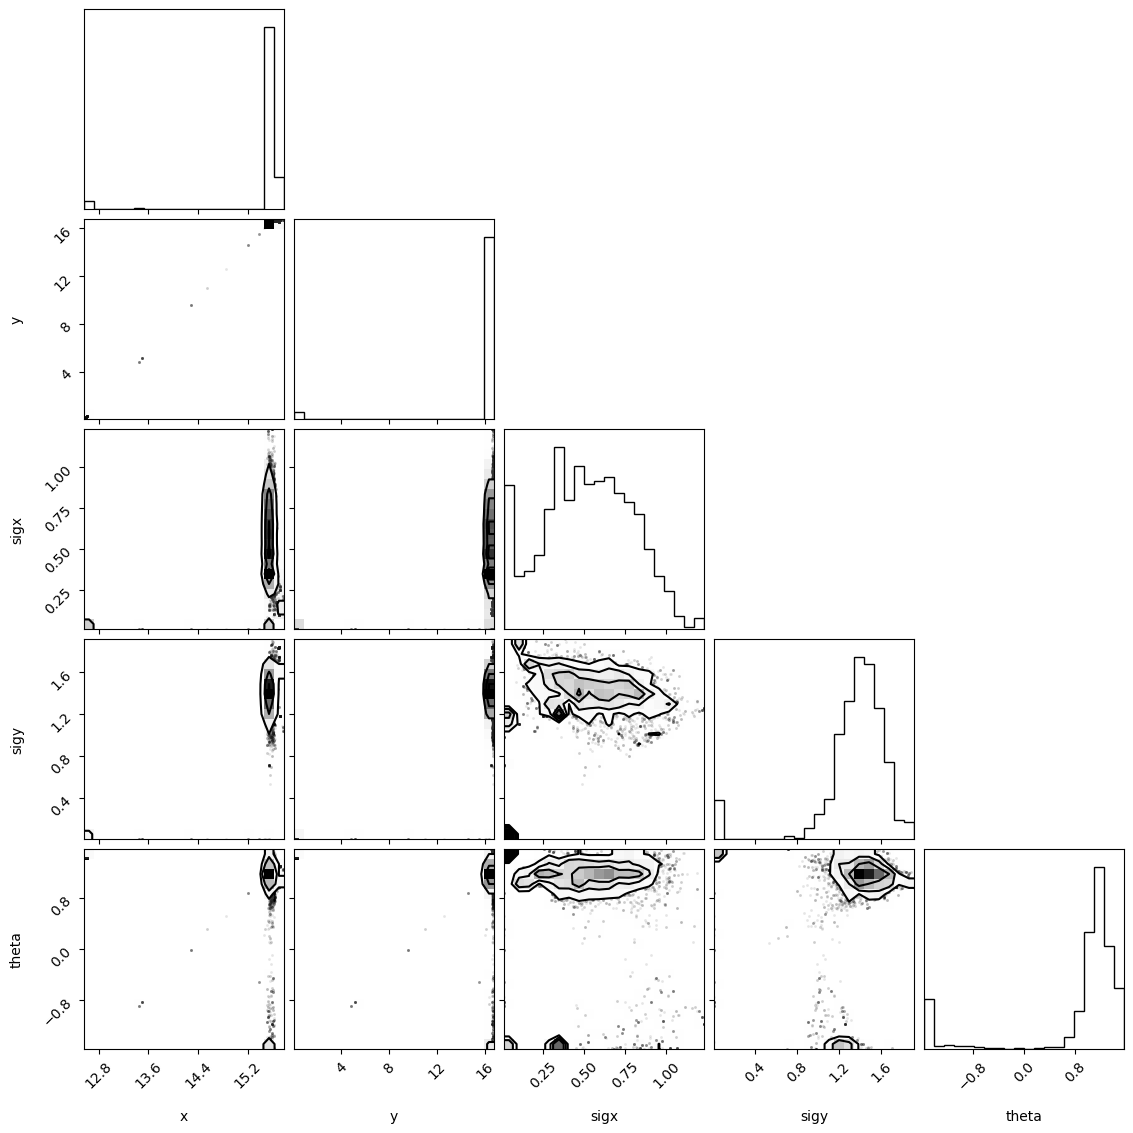

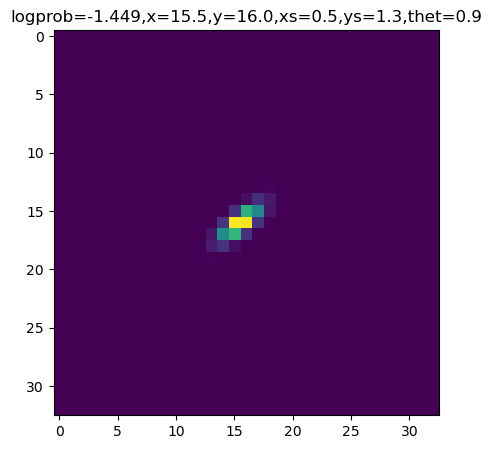

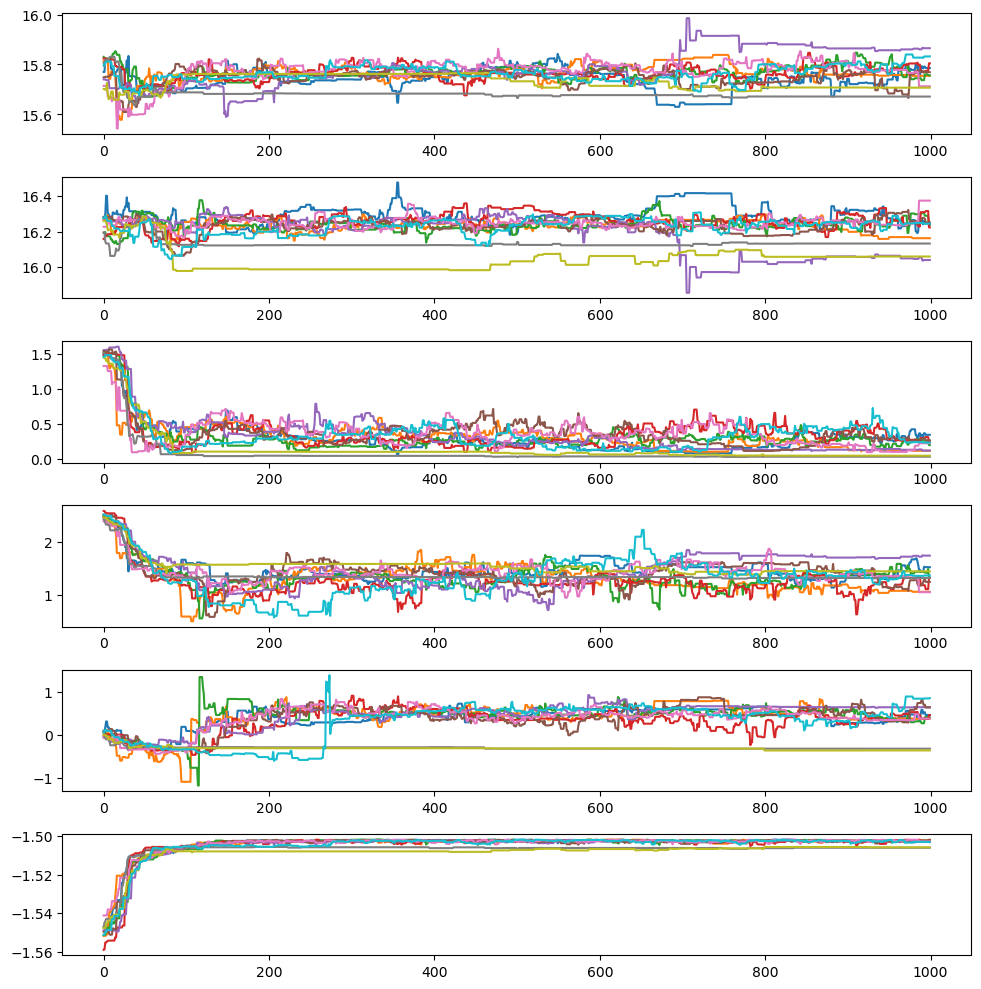

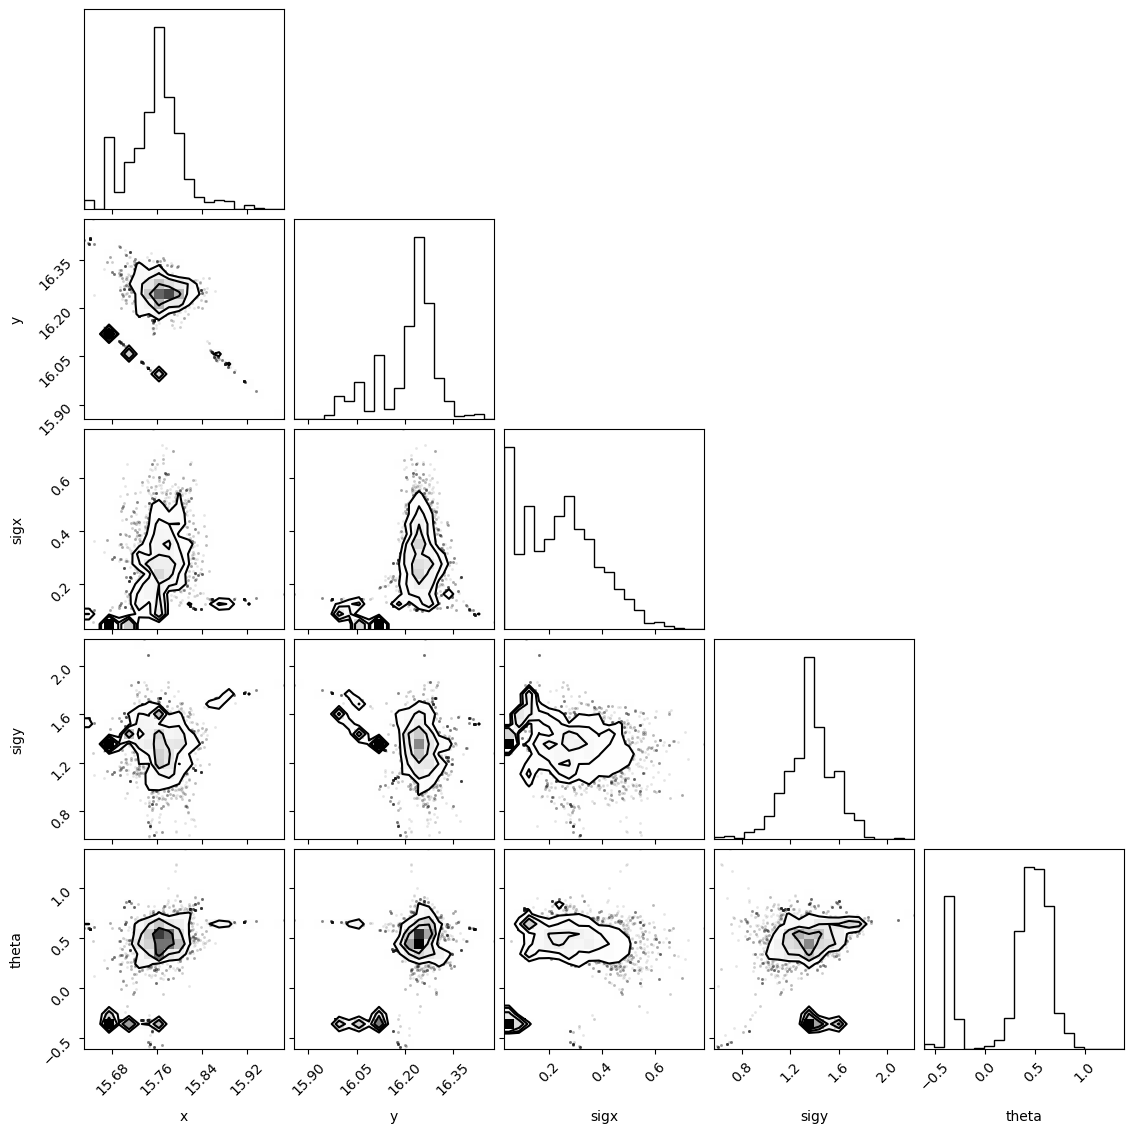

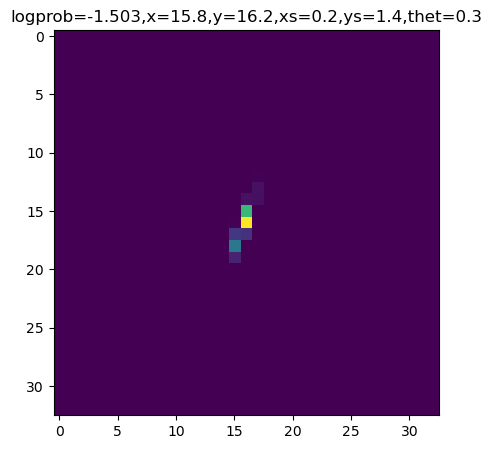

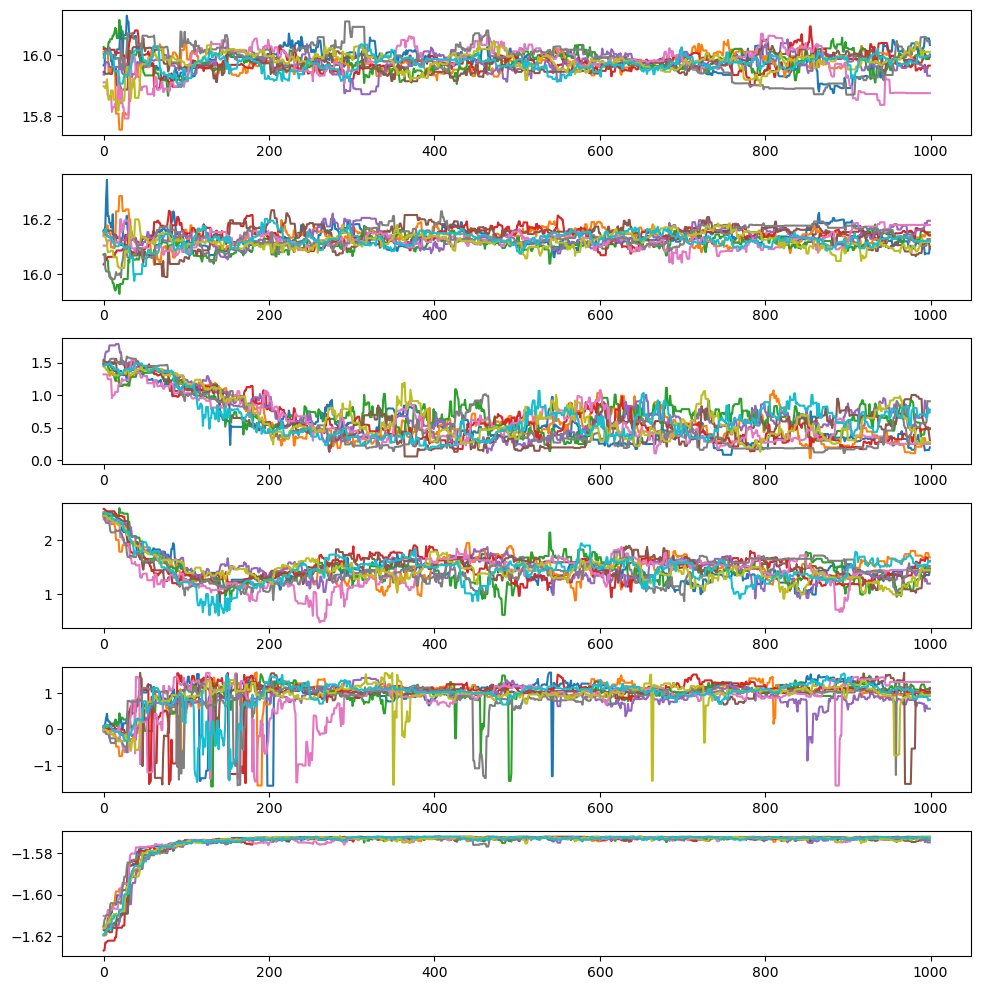

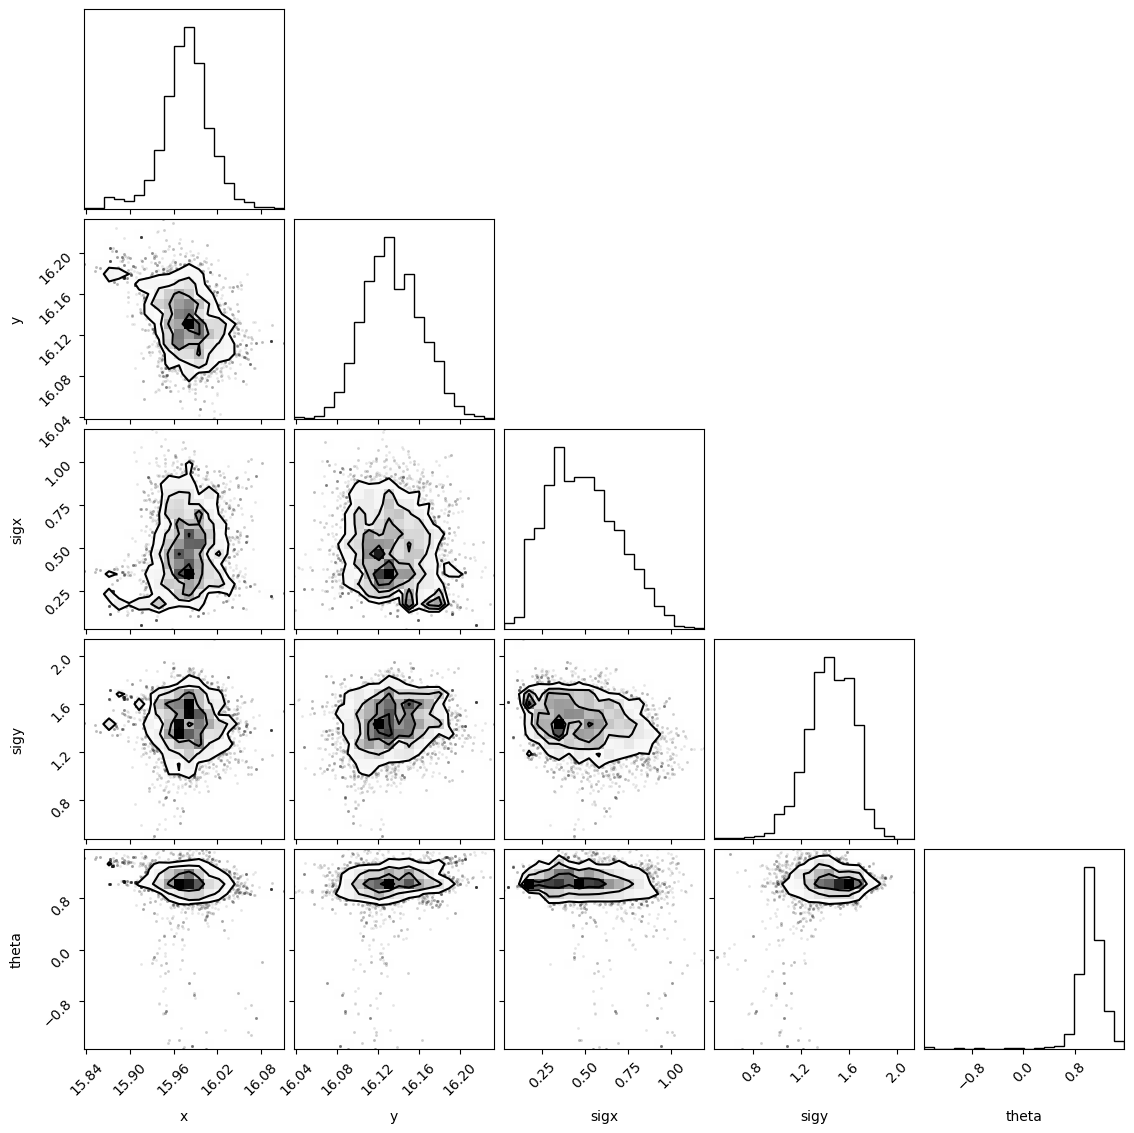

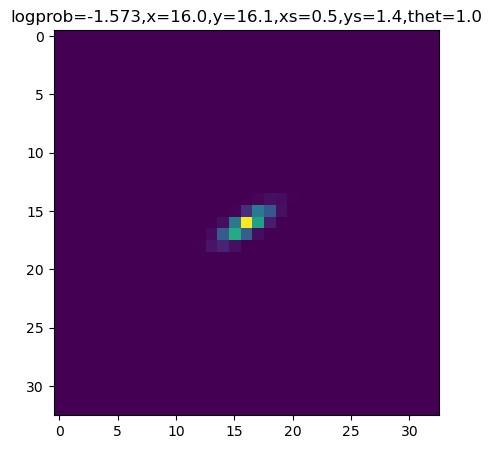

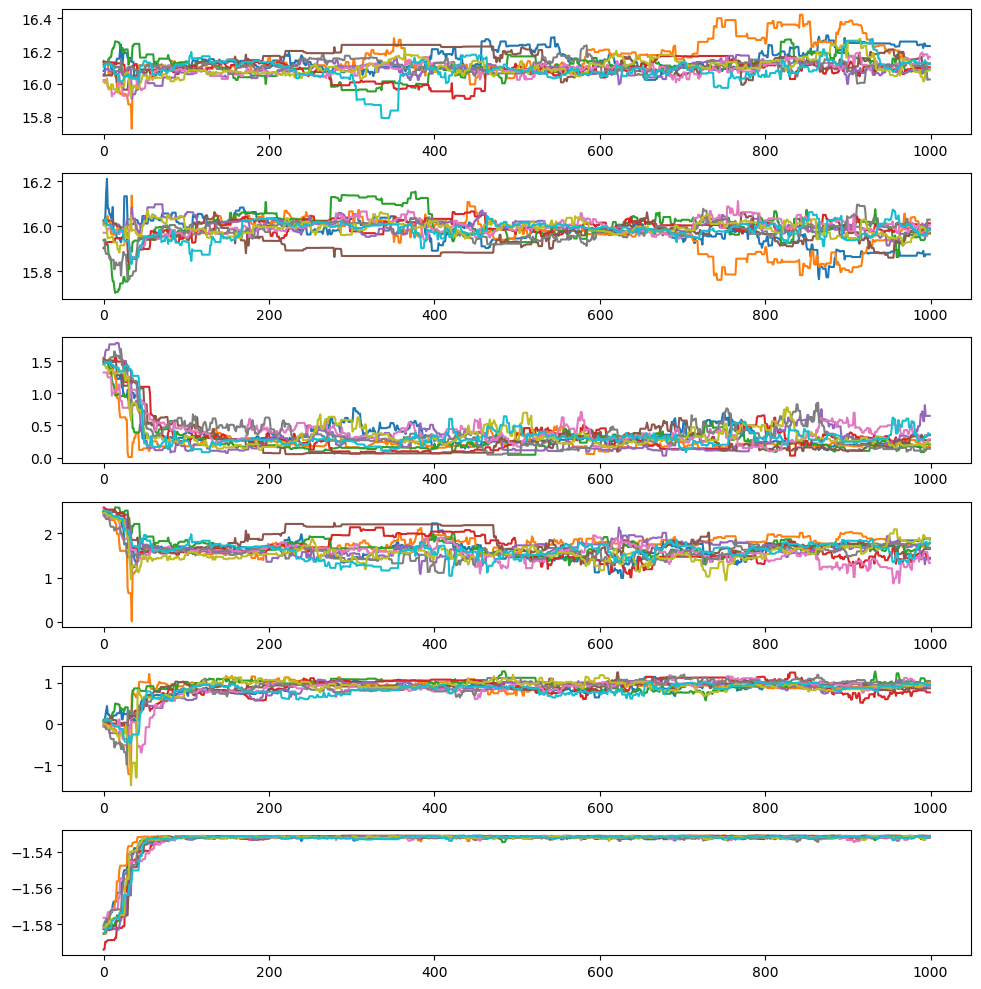

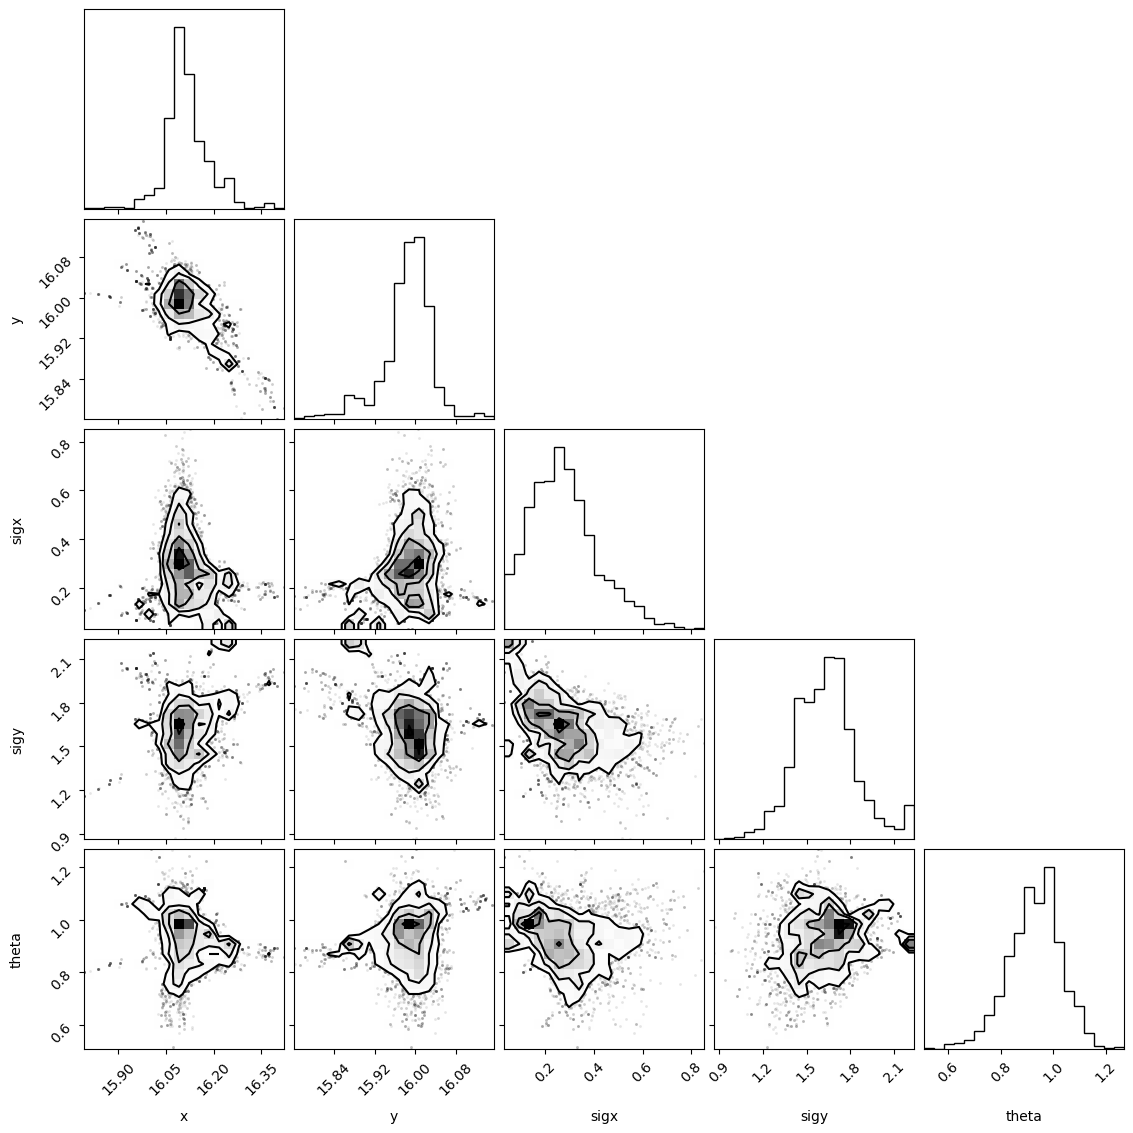

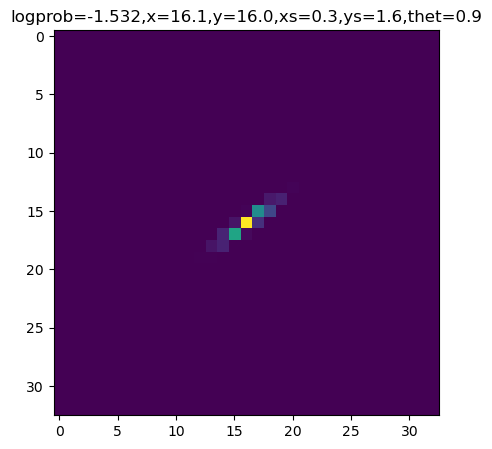

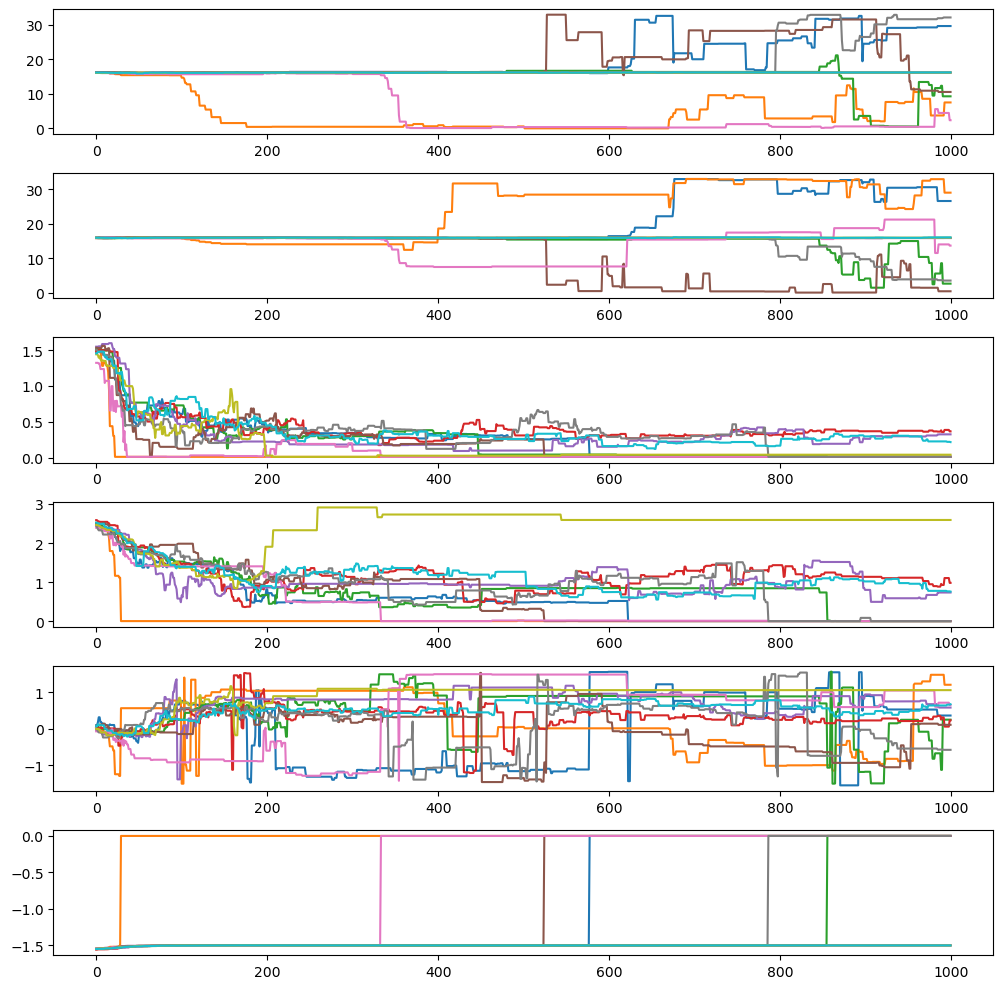

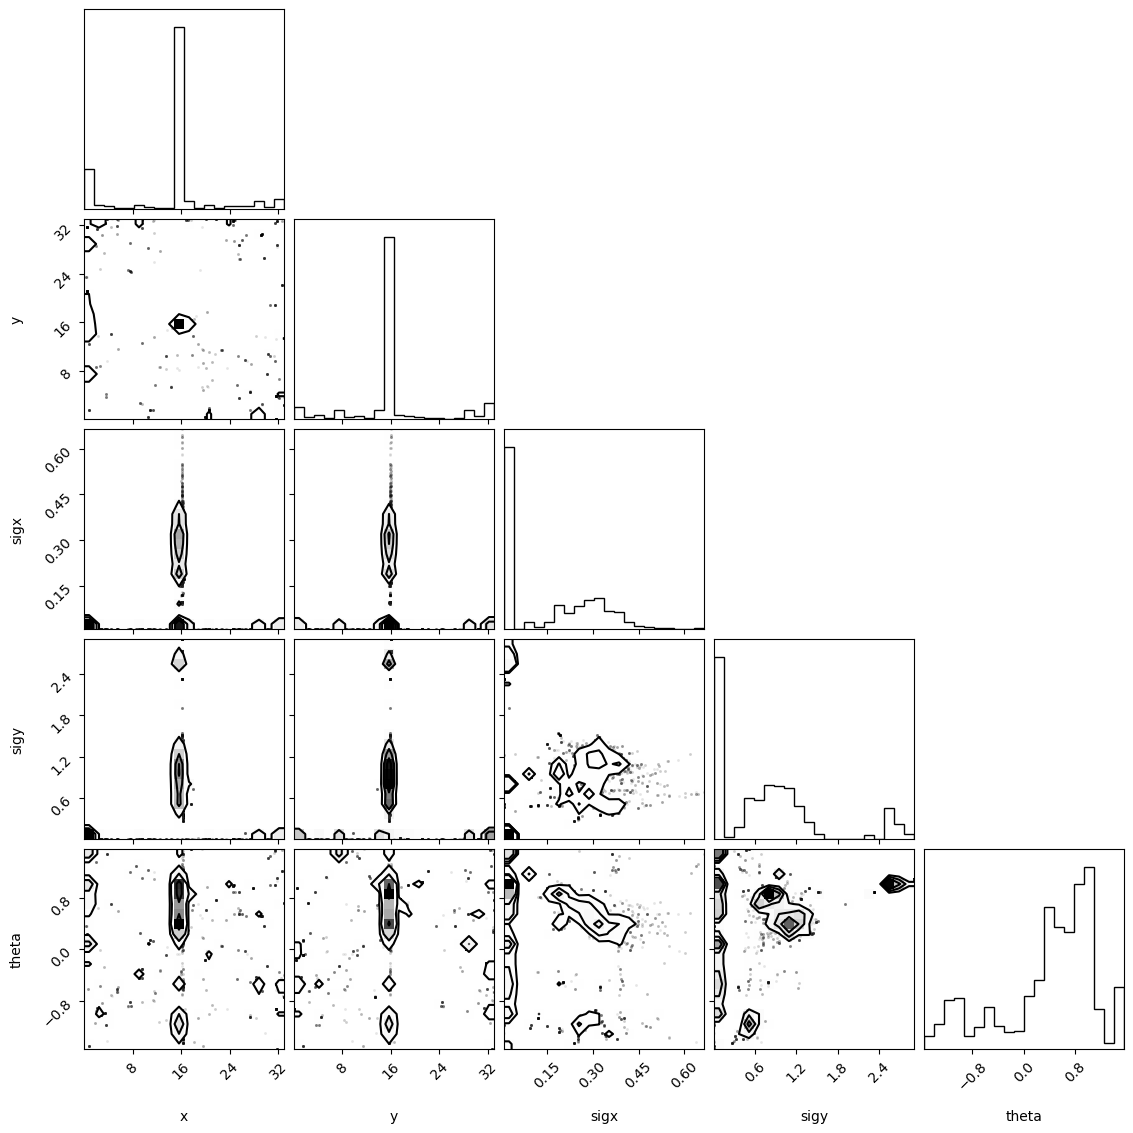

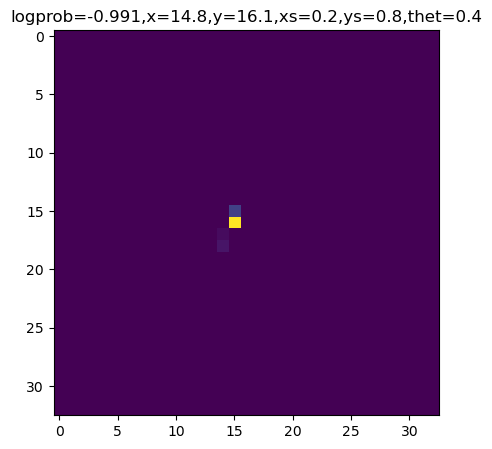

In [4]:
fiber_inds = np.arange(38)
timeind = 3

for specind in np.arange(111, 116):

    fitter2 = fit.PLMapFit(matrix_file = '/Users/yjkim/Documents/OnskyDemoPaper/results/matrices/matrix_specind%d_ngrid33_t%d.fits' % (specind, timeind))
    fitter2.prepare_data(fiber_inds)

    rc0 = fitter2.run_mcmc_pointsource(1, np.array([16,16]))
    x0 = np.average(rc0.sampler.get_chain(discard=100, flat=True)[:,1])
    y0 = np.average(rc0.sampler.get_chain(discard=100, flat=True)[:,0])

    rc = fitter2.run_mcmc_gaussian(np.array([x0,y0,1.5,2.5,0]), ini_ball_size=0.05, niter = 1000)
    chain = rc.sampler.get_chain(flat=True, discard=200)

    fig, axs = plt.subplots(nrows=6, figsize=(10,10))
    for i in range(10):
        for j in range(5): axs[j].plot(rc.sampler.get_chain()[:,i,j])
        axs[5].plot(rc.sampler.get_log_prob()[:,i]/13**2/38 * 2)
    fig.tight_layout()
    fig.savefig('gaussian_fitting_results/mcmc_specind%d_t%d.png' % (specind, timeind))

    fig = corner.corner(chain, labels=['x','y','sigx','sigy','theta'])
    fig.savefig('gaussian_fitting_results/corner_specind%d_t%d.png' % (specind, timeind))

    np.save('gaussian_fitting_results/chain_specind%d_t%d.npy' % (specind, timeind), chain)

    final_values = np.mean(chain, axis=0)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    gauss = Gaussian2D(amplitude=1, x_mean=final_values[0], y_mean=final_values[1], 
                x_stddev=final_values[2], y_stddev=final_values[3],
                theta=final_values[4])

    xg, yg = np.meshgrid(np.arange(33), np.arange(33))
    ax.imshow(gauss(xg,yg))
    ax.set_title('logprob=%.3f,x=%.1f,y=%.1f,xs=%.1f,ys=%.1f,thet=%.1f' % (np.mean(rc.sampler.get_log_prob(flat=True, discard=200))/38/13**2 * 2, final_values[0], final_values[1], final_values[2], final_values[3], final_values[4]))
    fig.savefig('gaussian_fitting_results/image_specind%d_t%d.png' % (specind, timeind))